In [17]:
var openDigger = require('../src/open_digger'); //导入open_digger
var query = openDigger.driver.clickhouse.query;
var endYear = 2021, startYear = 2015; // 起止年份
var startMonth = 1, endMonth = 12; //起止月份
var months = []
for(var m = startMonth;m <= endMonth;m++){
    months.push(m)
}
var my_repo_id = 3234987;
var my_repo_name = 'tgstation/tgstation'

12

In [18]:
var query = openDigger.driver.clickhouse.query;
query(    `SHOW DATABASES`)
    .then(res=>{    console.log(res);})

[
  { name: '_temporary_and_external_tables' },
  { name: 'default' },
  { name: 'github_log' },
  { name: 'system' }
]


In [19]:
query(
    `SHOW TABLES from github_log`
)
.then(res=>{
    console.log(res);
})

[ { name: 'events' } ]


┌─────────┬───────────┬──────────────┐
│ (index) │   时间    │ 新增 Star 数 │
├─────────┼───────────┼──────────────┤
│    0    │ '2015-1'  │      9       │
│    1    │ '2015-2'  │      11      │
│    2    │ '2015-3'  │      6       │
│    3    │ '2015-4'  │      7       │
│    4    │ '2015-5'  │      16      │
│    5    │ '2015-6'  │      12      │
│    6    │ '2015-7'  │      7       │
│    7    │ '2015-8'  │      5       │
│    8    │ '2015-9'  │      5       │
│    9    │ '2015-10' │      4       │
│   10    │ '2015-11' │      4       │
│   11    │ '2015-12' │      9       │
│   12    │ '2016-1'  │      8       │
│   13    │ '2016-2'  │      10      │
│   14    │ '2016-3'  │      11      │
│   15    │ '2016-4'  │      6       │
│   16    │ '2016-5'  │      2       │
│   17    │ '2016-6'  │      10      │
│   18    │ '2016-7'  │      6       │
│   19    │ '2016-8'  │      5       │
│   20    │ '2016-9'  │      9       │
│   21    │ '2016-10' │      7       │
│   22    │ '2016-11' │      4

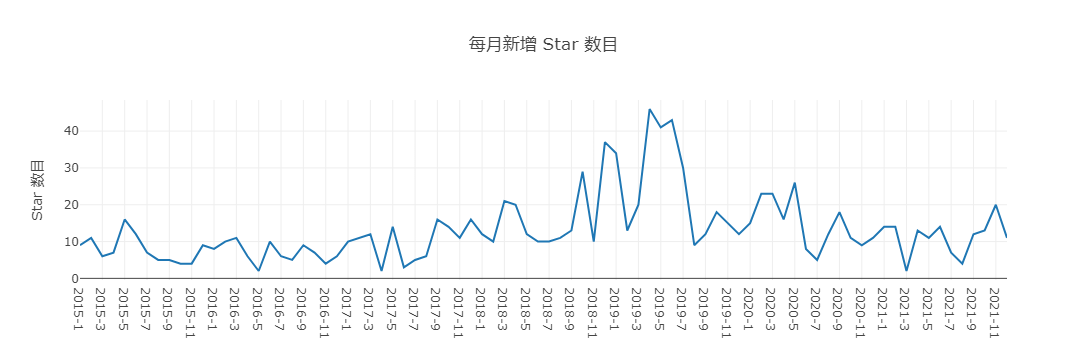

In [20]:
// 1.1 每月新增 Star 数
query(
    `
    select time, stars
    from 
    (select max(repo_stargazers_count)-min(repo_stargazers_count) as stars ,
    concat(toString(toYear(created_at)),'-',toString(toMonth(created_at))) as time
    from github_log.events
    where repo_id=${my_repo_id} and type in ('PullRequestEvent', 'PullRequestReviewCommentEvent') 
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    group by toYear(created_at),toMonth(created_at)
    order by toYear(created_at),toMonth(created_at))
    `
    ).then(data => {
    var stars = [], time = [], table = [];
        data.forEach(d=>{
        table.push({'时间':d.time, '新增 Star 数':parseInt(d.stars)});
            stars.push(d.stars);
            time.push(d.time)
        })
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: stars, mode:'scatter', name:'Star'}, 
    ], {
        title: '每月新增 Star 数目',
        yaxis: { title: 'Star 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬──────────────┐
│ (index) │   时间    │ 新增 fork 数 │
├─────────┼───────────┼──────────────┤
│    0    │ '2015-1'  │      36      │
│    1    │ '2015-2'  │      25      │
│    2    │ '2015-3'  │      34      │
│    3    │ '2015-4'  │      26      │
│    4    │ '2015-5'  │      14      │
│    5    │ '2015-6'  │      31      │
│    6    │ '2015-7'  │      24      │
│    7    │ '2015-8'  │      22      │
│    8    │ '2015-9'  │      22      │
│    9    │ '2015-10' │      31      │
│   10    │ '2015-11' │      14      │
│   11    │ '2015-12' │      27      │
│   12    │ '2016-1'  │      31      │
│   13    │ '2016-2'  │      26      │
│   14    │ '2016-3'  │      38      │
│   15    │ '2016-4'  │      32      │
│   16    │ '2016-5'  │      34      │
│   17    │ '2016-6'  │      24      │
│   18    │ '2016-7'  │      17      │
│   19    │ '2016-8'  │      21      │
│   20    │ '2016-9'  │      20      │
│   21    │ '2016-10' │      21      │
│   22    │ '2016-11' │      2

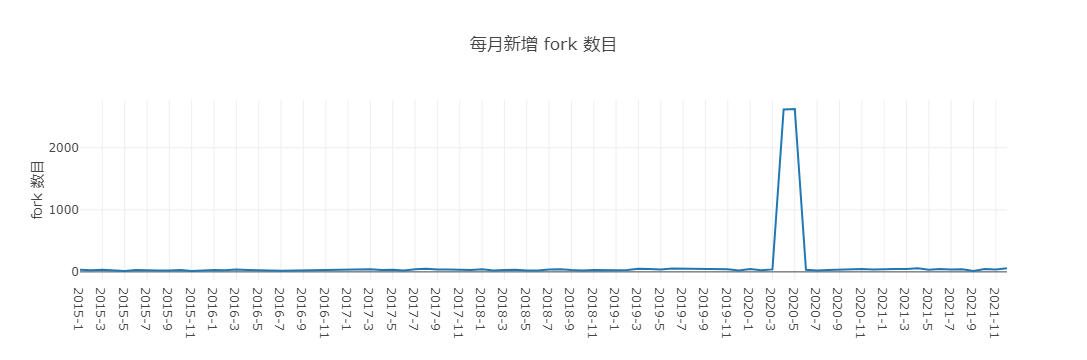

In [23]:
// 1.2 每月新增 fork 数
query(
   `
    select time, forks
    from 
    (select max(repo_forks_count)-min(repo_forks_count) as forks ,
    concat(toString(toYear(created_at)),'-',toString(toMonth(created_at))) as time
    from github_log.events
    where repo_id=${my_repo_id} and type in ('PullRequestEvent', 'PullRequestReviewCommentEvent')
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    group by toYear(created_at),toMonth(created_at)
    order by toYear(created_at),toMonth(created_at))
    `
    ).then(data => {
    var forks = [], time = [], table = [];
        data.forEach(d=>{
        table.push({'时间':d.time, '新增 fork 数':parseInt(d.forks)});
            forks.push(d.forks);
            time.push(d.time)
        })
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: forks, mode:'scatter', name:'Star'}, 
    ], {
        title: '每月新增 fork 数目',
        yaxis: { title: 'fork 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬────────────────────┐
│ (index) │   时间    │ 每月打开 issues 数 │
├─────────┼───────────┼────────────────────┤
│    0    │ '2015-1'  │        359         │
│    1    │ '2015-2'  │        249         │
│    2    │ '2015-3'  │        295         │
│    3    │ '2015-4'  │        317         │
│    4    │ '2015-5'  │        224         │
│    5    │ '2015-6'  │        246         │
│    6    │ '2015-7'  │        273         │
│    7    │ '2015-8'  │        279         │
│    8    │ '2015-9'  │        257         │
│    9    │ '2015-10' │        274         │
│   10    │ '2015-11' │        198         │
│   11    │ '2015-12' │        294         │
│   12    │ '2016-1'  │        394         │
│   13    │ '2016-2'  │        278         │
│   14    │ '2016-3'  │        209         │
│   15    │ '2016-4'  │        209         │
│   16    │ '2016-5'  │        269         │
│   17    │ '2016-6'  │        293         │
│   18    │ '2016-7'  │        166         │
│   19    │ '2016

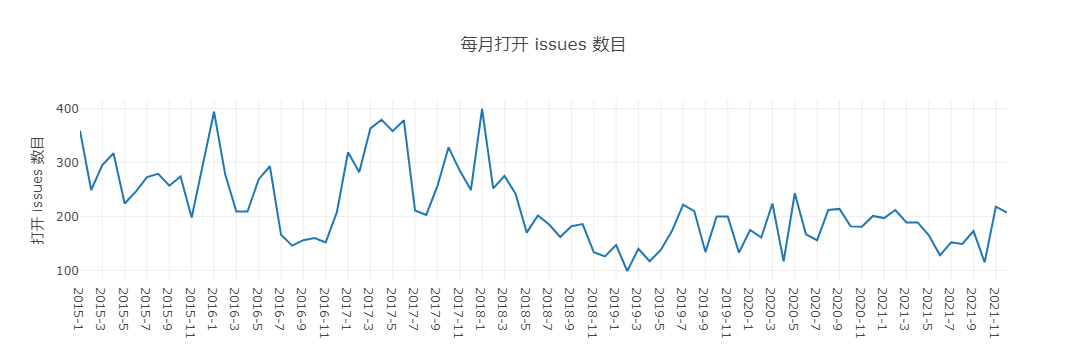

In [26]:
// 2.1 每月打开 Issue 数
query(
    `
    select time, open_issues
    from 
    (select count(issue_id) as open_issues,
    concat(toString(toYear(created_at)),'-',toString(toMonth(created_at))) as time
    from github_log.events
    where repo_id=${my_repo_id} and type = 'IssuesEvent' and action in('opened','reopened')
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    group by toYear(created_at),toMonth(created_at)
    order by toYear(created_at),toMonth(created_at))
    `
    ).then(data => {
    var open_issues = [], time = [], table = [];
    data.forEach(d=>{
        table.push({'时间':d.time, '每月打开 issues 数':parseInt(d.open_issues)});
            open_issues.push(d.open_issues);
            time.push(d.time)
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: open_issues, mode:'scatter', name:'打开issues'}, 
    ], {
        title: '每月打开 issues 数目',
        yaxis: { title: '打开 issues 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬────────────────────┐
│ (index) │   时间    │ 每月关闭 issues 数 │
├─────────┼───────────┼────────────────────┤
│    0    │ '2015-1'  │        234         │
│    1    │ '2015-2'  │        168         │
│    2    │ '2015-3'  │        198         │
│    3    │ '2015-4'  │        223         │
│    4    │ '2015-5'  │        250         │
│    5    │ '2015-6'  │        149         │
│    6    │ '2015-7'  │        167         │
│    7    │ '2015-8'  │        279         │
│    8    │ '2015-9'  │        209         │
│    9    │ '2015-10' │        176         │
│   10    │ '2015-11' │        172         │
│   11    │ '2015-12' │        354         │
│   12    │ '2016-1'  │        440         │
│   13    │ '2016-2'  │        177         │
│   14    │ '2016-3'  │        117         │
│   15    │ '2016-4'  │        141         │
│   16    │ '2016-5'  │        284         │
│   17    │ '2016-6'  │        318         │
│   18    │ '2016-7'  │        115         │
│   19    │ '2016

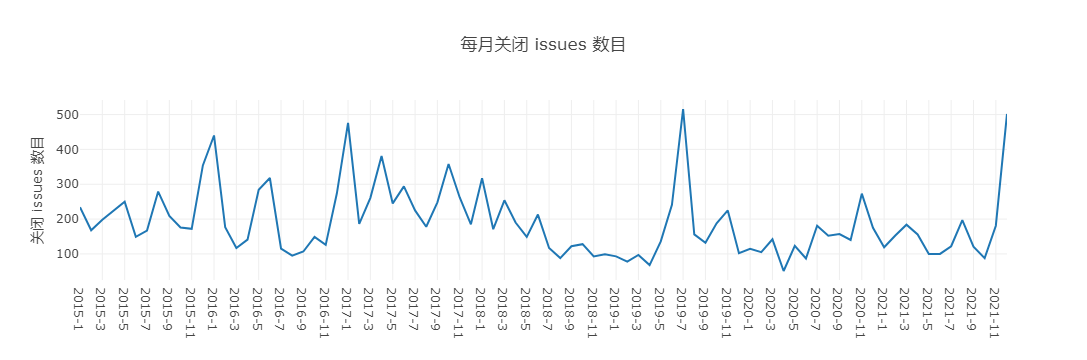

In [27]:
// 2.2 每月关闭 Issue 数
query(
    `
    select time, close_issues
    from 
    (select count(issue_id) as close_issues,
    concat(toString(toYear(created_at)),'-',toString(toMonth(created_at))) as time
    from github_log.events
    where repo_id=${my_repo_id} and type = 'IssuesEvent' and action in('closed')
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    group by toYear(created_at),toMonth(created_at)
    order by toYear(created_at),toMonth(created_at))
    `
    ).then(data => {
    //console.log(data)
    var close_issues = [], time = [], table = [];
    data.forEach(d=>{
     table.push({'时间':d.time, '每月关闭 issues 数':parseInt(d.close_issues)});
            close_issues.push(d.close_issues);
            time.push(d.time)
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: close_issues, mode:'scatter', name:'关闭issues'}, 
    ], {
        title: '每月关闭 issues 数目',
        yaxis: { title: '关闭 issues 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬──────────────────┐
│ (index) │   时间    │ 每月打开 PR 数目 │
├─────────┼───────────┼──────────────────┤
│    0    │ '2015-1'  │       427        │
│    1    │ '2015-2'  │       387        │
│    2    │ '2015-3'  │       323        │
│    3    │ '2015-4'  │       283        │
│    4    │ '2015-5'  │       274        │
│    5    │ '2015-6'  │       344        │
│    6    │ '2015-7'  │       404        │
│    7    │ '2015-8'  │       302        │
│    8    │ '2015-9'  │       335        │
│    9    │ '2015-10' │       441        │
│   10    │ '2015-11' │       385        │
│   11    │ '2015-12' │       639        │
│   12    │ '2016-1'  │       649        │
│   13    │ '2016-2'  │       480        │
│   14    │ '2016-3'  │       531        │
│   15    │ '2016-4'  │       586        │
│   16    │ '2016-5'  │       620        │
│   17    │ '2016-6'  │       690        │
│   18    │ '2016-7'  │       434        │
│   19    │ '2016-8'  │       526        │
│   20    │ '2016-9

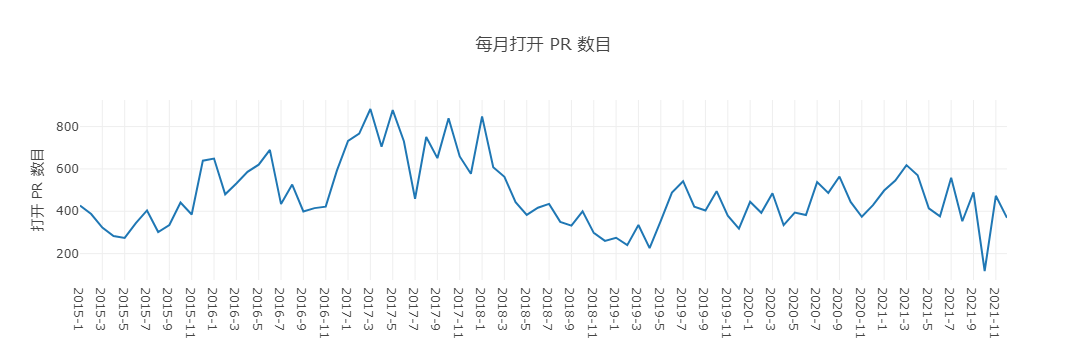

In [29]:
// 3.1 每月打开 PR 数
query(
   `
    select time, open_PRs
    from 
    (select count(issue_id) as open_PRs,
    concat(toString(toYear(created_at)),'-',toString(toMonth(created_at))) as time
    from github_log.events
    where repo_id=${my_repo_id} and type = 'PullRequestEvent' and action in('opened','reopened')
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    group by toYear(created_at),toMonth(created_at)
    order by toYear(created_at),toMonth(created_at))
    `
    ).then(data => {
     //console.log(data)
    var open_PRs = [], time = [], table = [];
    data.forEach(d=>{
       table.push({'时间':d.time, '每月打开 PR 数目':parseInt(d.open_PRs)});
            open_PRs.push(d.open_PRs);
            time.push(d.time)
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: open_PRs, mode:'scatter', name:'打开PR'}, 
    ], {
        title: '每月打开 PR 数目',
        yaxis: { title: '打开 PR 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬──────────────────┐
│ (index) │   时间    │ 每月合并 PR 数目 │
├─────────┼───────────┼──────────────────┤
│    0    │ '2015-1'  │       302        │
│    1    │ '2015-2'  │       256        │
│    2    │ '2015-3'  │       259        │
│    3    │ '2015-4'  │       208        │
│    4    │ '2015-5'  │       206        │
│    5    │ '2015-6'  │       247        │
│    6    │ '2015-7'  │       308        │
│    7    │ '2015-8'  │       218        │
│    8    │ '2015-9'  │       270        │
│    9    │ '2015-10' │       323        │
│   10    │ '2015-11' │       292        │
│   11    │ '2015-12' │       447        │
│   12    │ '2016-1'  │       409        │
│   13    │ '2016-2'  │       338        │
│   14    │ '2016-3'  │       347        │
│   15    │ '2016-4'  │       382        │
│   16    │ '2016-5'  │       426        │
│   17    │ '2016-6'  │       525        │
│   18    │ '2016-7'  │       325        │
│   19    │ '2016-8'  │       332        │
│   20    │ '2016-9

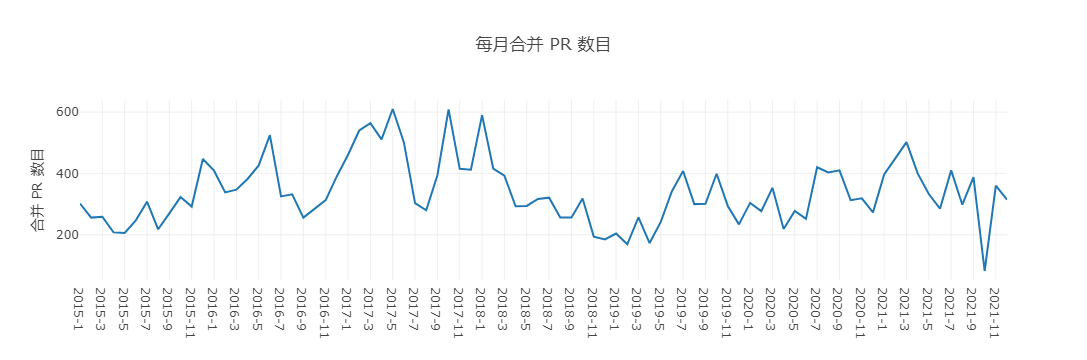

In [30]:
// 3.2 每月合并 PR 数
query(
   `
    select time, merge_PRs
    from 
    (select count(issue_id) as merge_PRs,
    concat(toString(toYear(created_at)),'-',toString(toMonth(created_at))) as time
    from github_log.events
    where repo_id=${my_repo_id} and type = 'PullRequestEvent' and action in('closed') and pull_merged=1
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    group by toYear(created_at),toMonth(created_at)
    order by toYear(created_at),toMonth(created_at))
    `
    ).then(data => {
     //console.log(data)
    var merge_PRs = [], time = [], table = [];
    data.forEach(d=>{
           table.push({'时间':d.time, '每月合并 PR 数目':parseInt(d.merge_PRs)});
            merge_PRs.push(d.merge_PRs);
            time.push(d.time)
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: merge_PRs, mode:'scatter', name:'合并PR'}, 
    ], {
        title: '每月合并 PR 数目',
        yaxis: { title: '合并 PR 数目'},
        xaxis: {type: 'category'}
    });
});

┌─────────┬───────────┬────────────────────────┐
│ (index) │   时间    │ 每月仓库活跃开发者数目 │
├─────────┼───────────┼────────────────────────┤
│    0    │ '2015-1'  │          191           │
│    1    │ '2015-2'  │          178           │
│    2    │ '2015-3'  │          188           │
│    3    │ '2015-4'  │          194           │
│    4    │ '2015-5'  │          177           │
│    5    │ '2015-6'  │          220           │
│    6    │ '2015-7'  │          198           │
│    7    │ '2015-8'  │          186           │
│    8    │ '2015-9'  │          184           │
│    9    │ '2015-10' │          194           │
│   10    │ '2015-11' │          186           │
│   11    │ '2015-12' │          197           │
│   12    │ '2016-1'  │          209           │
│   13    │ '2016-2'  │          226           │
│   14    │ '2016-3'  │          214           │
│   15    │ '2016-4'  │          209           │
│   16    │ '2016-5'  │          241           │
│   17    │ '2016-6'  │          

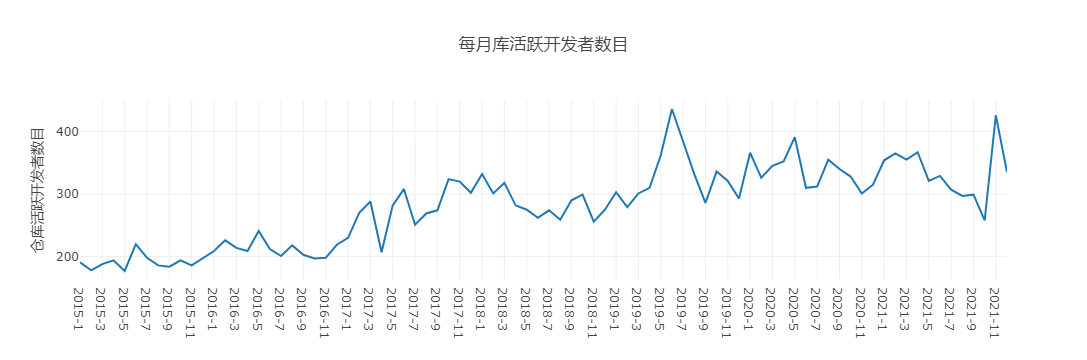

In [31]:
// 4 每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数
query(
    `
    select count(distinct actor_id) as active_users,
    concat(toString(toYear(created_at)),'-',toString(toMonth(created_at))) as time
    from github_log.events
    where repo_id=${my_repo_id}
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    group by toYear(created_at),toMonth(created_at)
    order by toYear(created_at),toMonth(created_at)
    `
    ).then(data => {
      //console.log(data)
    var active_users = [], time = [], table = [];
    data.forEach(d=>{
        table.push({'时间':d.time, '每月仓库活跃开发者数目':parseInt(d.active_users)});
            active_users.push(d.active_users);
            time.push(d.time)
    }
    )
    console.table(table);
    openDigger.render.plotly([
        {x: time, y: active_users, mode:'scatter', name:'仓库活跃开发者数目'}, 
    ], {
        title: '每月库活跃开发者数目',
        yaxis: { title: '仓库活跃开发者数目'},
        xaxis: {type: 'category'}
    });
});

In [36]:
// 5 Issue 从打开到关闭的平均时长和中位数（单位：天）
function median_of_arr(arr) {
        const middle = (arr.length + 1) / 2;
         // 避免在排序时发生变异
        const sorted = [...arr].sort((a, b) => a - b);
        const isEven = sorted.length % 2 === 0;
        return isEven ? (sorted[middle - 1.5]+ sorted[middle - 0.5]) / 2 : sorted[middle - 1];
    }
query(
    `
    select avg(dateDiff('day',issue_created_at,issue_closed_at)) avg,median(dateDiff('day',issue_created_at,issue_closed_at)) as median
    from github_log.events
    where repo_id=${my_repo_id} and type = 'IssuesEvent'and action = 'closed'
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    `
    ).then(data => {
    //console.log(data);
    var avg=0,median=[],count=0;
    data.forEach(d=>{
        avg += d.avg;
        median.push(d.median);
        count ++;
    }
    )
    console.log("Issue 从打开到关闭的平均时长:",avg/count,"天\n")
    console.log("Issue 从打开到关闭的时长中位数:",median_of_arr(median),"天\n")
});

Issue 从打开到关闭的平均时长: 126.24073376052267 天

Issue 从打开到关闭的时长中位数: 5 天



In [39]:
// 6 PR 从打开到合入的平均时长和中位数（单位：天）
query(
   `
    select avg(dateDiff('day',issue_created_at,pull_merged_at)) avg,median(dateDiff('day',issue_created_at,pull_merged_at)) as median
    from github_log.events
    where repo_id=${my_repo_id} and type = 'PullRequestEvent'and action = 'closed' and pull_merged=1
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear}
    `
    ).then(data => {
    //console.log(data);
    var avg=0,median=[],count=0;
    data.forEach(d=>{
        avg += d.avg;
        median.push(d.median);
        count ++;
    }
    )
    console.log("PR 从打开到关闭的平均时长:",avg/count,"天\n")
    console.log("PR 从打开到关闭的时长中位数:",median_of_arr(median),"天\n")
});

PR 从打开到关闭的平均时长: 3.69496170332373 天

PR 从打开到关闭的时长中位数: 2 天



In [44]:
// 7.1 Issue从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
query(
  ` 
    select avg(min_comment_time) as avg, median(min_comment_time) as median
    from(
    select min(dateDiff('day',issue_created_at,issue_comment_created_at)) as min_comment_time
    from(
    select issue_id,issue_created_at,issue_comment_created_at from github_log.events where repo_id=${my_repo_id} and type='IssueCommentEvent' and action='created'
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear})
    group by issue_id)
    `
    ).then(data => {
    //console.log(data);
    var avg=0,median=[],count=0;
    data.forEach(d=>{
        avg += d.avg;
        median.push(d.median);
        count ++;
    }
    )
    console.log("Issue从打开到第一次有人回复（非本人回复）的平均时长:",avg/count,"天\n")
    console.log("Issue从打开到第一次有人回复（非本人回复）的时长中位数:",median_of_arr(median),"天\n")
});

Issue从打开到第一次有人回复（非本人回复）的平均时长: 9.404969137173055 天

Issue从打开到第一次有人回复（非本人回复）的时长中位数: 0 天



In [48]:
// 7.2 PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）
query(
  ` 
    select avg(min_comment_time) as avg, median(min_comment_time) as median
    from(
    select min(dateDiff('day',issue_created_at,pull_review_comment_created_at)) as min_comment_time
    from(
    select issue_id,issue_created_at,pull_review_comment_created_at from github_log.events where repo_id=${my_repo_id} and type='PullRequestReviewCommentEvent' and action='created'
    and toYear(created_at) >=${startYear} and toYear(created_at) <= ${endYear})
    group by issue_id)
    `
    ).then(data => {
    //console.log(data);
    var avg=0,median=[],count=0;
    data.forEach(d=>{
        avg += d.avg;
        median.push(d.median);
        count ++;
    }
    )
     console.log("PR 从打开到第一次有人回复（非本人回复）的平均时长:",avg/count,"天\n")
    console.log("PR 从打开到第一次有人回复（非本人回复）的时长中位数:",median_of_arr(median),"天\n")
});

PR 从打开到第一次有人回复（非本人回复）的平均时长: 1.4604524180967238 天

PR 从打开到第一次有人回复（非本人回复）的时长中位数: 0 天

